In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

vision = pd.read_csv("vision.zip")
del vision["Unnamed: 0"]
del vision["id"]
del vision["wardslost"]

vision = vision[vision['visionscore'] != 0]
vision = vision[vision['duration'] > 600]
vision = vision[vision['duration'] < 1800]

print(vision.shape)
vision.head()

(49587, 4)


,duration,wardsplaced,wardskilled,visionscore
1,1693,52.0,8.0,84.0
2,1482,44.0,2.0,62.0
5,1593,44.0,3.0,87.0
6,1589,36.0,4.0,58.0
7,1664,48.0,2.0,69.0


In [2]:
vision_train = vision.sample(frac=0.8, random_state=0)
vision_test = vision.drop(vision_train.index)

train_features = vision_train.copy()
test_features = vision_test.copy()

train_labels = train_features.pop('visionscore')
test_labels = test_features.pop('visionscore')

In [3]:
normalizer = tf.keras.layers.experimental.preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [4]:
model = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(loss='mean_absolute_error',
    optimizer=tf.keras.optimizers.Adam(0.001))

In [5]:
%%time
history = model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=2, epochs=50)

Epoch 1/50
992/992 - 1s - loss: 19.6253 - val_loss: 8.8796
Epoch 2/50
992/992 - 1s - loss: 8.8250 - val_loss: 8.7403
Epoch 3/50
992/992 - 1s - loss: 8.7635 - val_loss: 8.7277
Epoch 4/50
992/992 - 1s - loss: 8.7298 - val_loss: 8.6840
Epoch 5/50
992/992 - 1s - loss: 8.7014 - val_loss: 8.6870
Epoch 6/50
992/992 - 1s - loss: 8.6829 - val_loss: 8.5720
Epoch 7/50
992/992 - 1s - loss: 8.6559 - val_loss: 8.5608
Epoch 8/50
992/992 - 1s - loss: 8.6373 - val_loss: 8.5785
Epoch 9/50
992/992 - 1s - loss: 8.6297 - val_loss: 8.5695
Epoch 10/50
992/992 - 1s - loss: 8.6338 - val_loss: 8.5167
Epoch 11/50
992/992 - 1s - loss: 8.5878 - val_loss: 8.5533
Epoch 12/50
992/992 - 1s - loss: 8.5665 - val_loss: 8.4844
Epoch 13/50
992/992 - 1s - loss: 8.5279 - val_loss: 8.4523
Epoch 14/50
992/992 - 1s - loss: 8.4830 - val_loss: 8.4767
Epoch 15/50
992/992 - 1s - loss: 8.4790 - val_loss: 8.3924
Epoch 16/50
992/992 - 1s - loss: 8.4640 - val_loss: 8.4542
Epoch 17/50
992/992 - 1s - loss: 8.4633 - val_loss: 8.5477
Epoch

In [6]:
results = model.evaluate(test_features, test_labels, verbose=2)

310/310 - 0s - loss: 8.8062


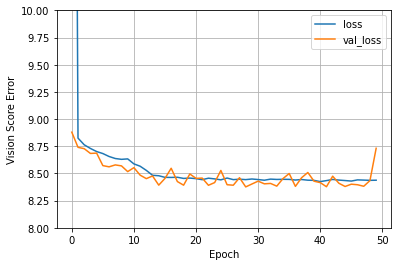

In [7]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([8, 10])
plt.xlabel('Epoch')
plt.ylabel('Vision Score Error')
plt.legend()
plt.grid(True)

[]

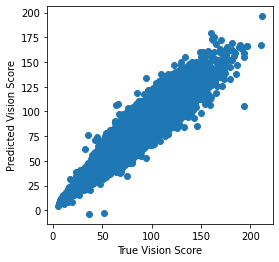

In [8]:
test_predictions = model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Vision Score')
plt.ylabel('Predicted Vision Score')
plt.plot()

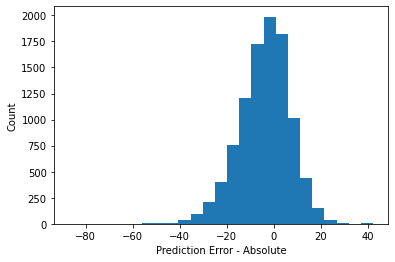

In [9]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error - Absolute')
_ = plt.ylabel('Count')

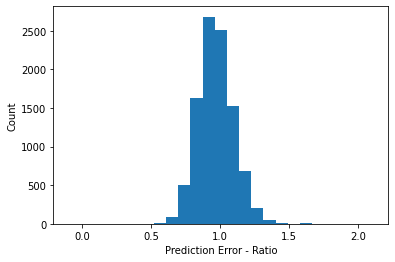

In [10]:
error = test_predictions / test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error - Ratio')
_ = plt.ylabel('Count')

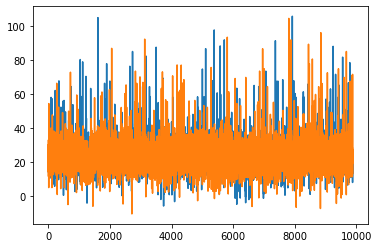

In [11]:
rankedRaw = pd.read_csv("high_diamond_ranked_10min.csv.zip")
ranked = rankedRaw.copy()
ranked["duration"] = 600
blue = ranked[['duration','blueWardsPlaced', 'blueWardsDestroyed']]
prediction = model.predict(blue).flatten()
plt.plot(prediction)
rankedRaw['blueVisionEstimate'] = prediction
red = ranked[['duration','redWardsPlaced', 'redWardsDestroyed']]
prediction = model.predict(red).flatten()
rankedRaw['redVisionEstimate'] = prediction
plt.plot(prediction)

In [12]:
model.save("visionmodel3")
c_o = dict(method='zip',
    archive_name='estimate3.csv')  
rankedRaw.to_csv("estimate3.zip", index=True, compression=c_o)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: visionmodel3/assets
